# KNN- Classifier
**Author - Dev**

We will do Knn classifier on our same housing market data.

Importing all the needed modules: 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors, model_selection, metrics
import matplotlib.pyplot as plt
import seaborn as sb

**Reading Data**

In [2]:
#Importing our training and testing house prices data set. 
df=pd.read_excel("/Users/devmarwah/Downloads/BA-Predict-2.xlsx")

In [3]:
#Printing head of training dataset:
df.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,YrSold,SalePrice
0,7340,4,1971,1971,322,1,0,2,4,0,684,2007,110000
1,8712,5,1957,2000,860,1,0,2,5,0,756,2009,153000
2,7875,7,2003,2003,0,2,1,3,8,1,393,2006,180000
3,14859,7,2006,2006,0,2,0,3,7,1,690,2006,240000
4,6173,5,1967,1967,599,1,0,3,6,0,288,2007,125500


**Data cleaning:**

Checking for any missing values in our dataset: 

In [4]:
df.isna().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
BsmtFinSF1      0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageArea      0
YrSold          0
SalePrice       0
dtype: int64

Hence, there are no missing values in our dataset.

Now, checking for duplicates in the dataset.

In [5]:
df.duplicated().sum()

0

Hence, there are no dubplicate values in our dataset. 

**Data prepration:**

In [6]:
df.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,YrSold,SalePrice
0,7340,4,1971,1971,322,1,0,2,4,0,684,2007,110000
1,8712,5,1957,2000,860,1,0,2,5,0,756,2009,153000
2,7875,7,2003,2003,0,2,1,3,8,1,393,2006,180000
3,14859,7,2006,2006,0,2,0,3,7,1,690,2006,240000
4,6173,5,1967,1967,599,1,0,3,6,0,288,2007,125500


In our dataset, following variables are categorical:
"OverallQual","FullBath","HalfBath","BedroomAbvGr","TotRmsAbvGrd","Fireplaces","YrSold"
Hence, we need to convert them to category dtype.

In [7]:
df[["OverallQual","FullBath","HalfBath","BedroomAbvGr","TotRmsAbvGrd","Fireplaces","YrSold"]]=df[["OverallQual","FullBath","HalfBath","BedroomAbvGr","TotRmsAbvGrd","Fireplaces","YrSold"]].astype('category')
#Printing dtypes of our data to verify:
df.dtypes

LotArea            int64
OverallQual     category
YearBuilt          int64
YearRemodAdd       int64
BsmtFinSF1         int64
FullBath        category
HalfBath        category
BedroomAbvGr    category
TotRmsAbvGrd    category
Fireplaces      category
GarageArea         int64
YrSold          category
SalePrice          int64
dtype: object

Hence, all categorical variables have been converted to category dtype now.

In [8]:
#Variable OverallQual just rates overall quality and is not necessary in our analysis so we will drop it
df.drop('OverallQual',axis=1,inplace=True)

In [9]:
#Printing count of distinct categories in variables to find variables which should be converted as dummy variables:
print(
df['FullBath'].unique(),
df['HalfBath'].unique(),
df['BedroomAbvGr'].unique(),
df['TotRmsAbvGrd'].unique(),
df['Fireplaces'].unique(),
df['YrSold'].unique())

[1, 2, 0]
Categories (3, int64): [0, 1, 2] [0, 1, 2]
Categories (3, int64): [0, 1, 2] [2, 3, 5, 4, 1]
Categories (5, int64): [1, 2, 3, 4, 5] [4, 5, 8, 7, 6, 12, 9, 10, 11]
Categories (9, int64): [4, 5, 6, 7, ..., 9, 10, 11, 12] [0, 1, 2]
Categories (3, int64): [0, 1, 2] [2007, 2009, 2006, 2010, 2008]
Categories (5, int64): [2006, 2007, 2008, 2009, 2010]


In [10]:
#Here totrmsabvgrd has 9 categories and can make our model complex hence we are dropping it:
df.drop('TotRmsAbvGrd',axis=1,inplace=True)

Turning other categorical variables into dummy variables as all of them have more than two categories; 

In [11]:
df=pd.get_dummies(df,columns=["FullBath","HalfBath","BedroomAbvGr","Fireplaces","YrSold"]).astype('int')

In [12]:
#Printing head() of dataset to verify dummy variables: 
columns=df.columns[[0,1,2,3,4,5]]
columns

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'GarageArea',
       'SalePrice'],
      dtype='object')

Normalizing our data: 

In [13]:
df_norm=pd.DataFrame(preprocessing.StandardScaler().fit_transform(df[['LotArea','YearBuilt','YearRemodAdd','BsmtFinSF1','GarageArea','SalePrice']]))
df_norm=pd.DataFrame(df_norm)
df_norm.columns=columns
#Replacing normalized columns in our main dataframe
df[['LotArea','YearBuilt','YearRemodAdd','BsmtFinSF1','GarageArea','SalePrice']]=df_norm[['LotArea','YearBuilt','YearRemodAdd','BsmtFinSF1','GarageArea','SalePrice']]
df.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,GarageArea,SalePrice,FullBath_0,FullBath_1,FullBath_2,HalfBath_0,...,BedroomAbvGr_4,BedroomAbvGr_5,Fireplaces_0,Fireplaces_1,Fireplaces_2,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,-0.546080,-0.109679,-0.668838,-0.260487,0.994166,-1.028489,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,-0.230414,-0.598001,0.714417,1.085306,1.337347,-0.321871,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,-0.422989,1.006486,0.857512,-1.065961,-0.392858,0.121820,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,1.183869,1.111127,1.000608,-1.065961,1.022764,1.107798,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
4,-0.814580,-0.249199,-0.859632,0.432421,-0.893330,-0.773778,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0


Knn classification is applied on classes. Hence, we will convert Saleprice into three categories.

In [14]:
#Coverting SalePrice into 'High' and 'Low' class: 
df['Price']=pd.DataFrame(np.where(df['SalePrice']>=df['SalePrice'].mean(),'High','Low'))
df.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,GarageArea,SalePrice,FullBath_0,FullBath_1,FullBath_2,HalfBath_0,...,BedroomAbvGr_5,Fireplaces_0,Fireplaces_1,Fireplaces_2,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,Price
0,-0.546080,-0.109679,-0.668838,-0.260487,0.994166,-1.028489,0,1,0,1,...,0,1,0,0,0,1,0,0,0,Low
1,-0.230414,-0.598001,0.714417,1.085306,1.337347,-0.321871,0,1,0,1,...,0,1,0,0,0,0,0,1,0,Low
2,-0.422989,1.006486,0.857512,-1.065961,-0.392858,0.121820,0,0,1,0,...,0,0,1,0,1,0,0,0,0,High
3,1.183869,1.111127,1.000608,-1.065961,1.022764,1.107798,0,0,1,1,...,0,0,1,0,1,0,0,0,0,High
4,-0.814580,-0.249199,-0.859632,0.432421,-0.893330,-0.773778,0,1,0,1,...,0,1,0,0,0,1,0,0,0,Low


Making training and testing data sets: 

In [15]:
#Dropping SalePrice first
df.drop('SalePrice',axis=1,inplace=True)

In [16]:
#Making training and testing dataset now: 
x=np.array(df.drop('Price',axis=1))
y=np.array(df['Price'])
t=model_selection.train_test_split
x_train, x_test, y_train, y_test = t(x,y,test_size=0.2,random_state=2)

**Model Construction**

Our data is finally prepared and we can apply knn-classifier model :

In [17]:
clf=neighbors.KNeighborsClassifier(n_neighbors=2)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

Printing accuracy of our model: 

In [18]:
print(clf.score(x_test,y_test))

0.8333333333333334


Having a look at predictions made: 

In [21]:
p=clf.predict(x_test)

Making confusion matrix of our model:

Text(50.722222222222214, 0.5, 'Predicted Values')

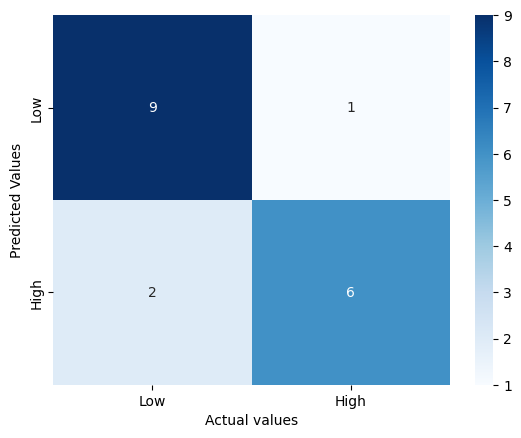

In [22]:
cm=metrics.confusion_matrix
c=cm(y_test,p)
plt.figure()
sb.heatmap(c,annot=True,cmap="Blues",xticklabels=['Low','High'],yticklabels=['Low','High'])
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')

This concludes our assignment.